#### Smartphone Benchmark Analysis

##### Cleaning and Grouping the data into a single file

In [2]:
### import neccesary libraries


import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [29]:
all_benchmark = pd.read_csv(r'C:\Users\sadeo\Desktop\Smartphone benchmark\ML_ALL_benchmarks.csv')
all_benchmark.head(10)

,device,company,cpuName,cores,clock,cpuScore,gpuScore,npuScore
0,iPhone 13 Pro Max,Apple,A15 Bionic,6,3230,935,2273,2676
1,iPhone 13 Pro,Apple,A15 Bionic,6,3230,931,2261,2665
2,iPhone 13 mini,Apple,A15 Bionic,6,3230,924,1852,2660
3,iPad Pro (12.9-inch 5th generation),Apple,M1,8,3190,1013,2824,2657
4,iPad Pro (11-inch 3rd generation),Apple,M1,8,3190,1011,2842,2656
5,iPhone 13,Apple,A15 Bionic,6,3230,916,1831,2605
6,iPad mini (6th generation),Apple,A15 Bionic,6,2920,899,2095,2522
7,iPad Air (4th generation),Apple,A14 Bionic,6,2990,881,1950,2360
8,iPhone 12,Apple,A14 Bionic,6,2990,859,1584,2341
9,iPhone 12 Mini,Apple,A14 Bionic,6,2990,856,1578,2324


##### Adding a new column to show the name of the company and their respective chip

In [45]:
all_benchmark['device_cpu'] = all_benchmark['company'] + ' ' + all_benchmark['cpuName']
all_benchmark.head()

,device,company,cpuName,cores,clock,cpuScore,gpuScore,npuScore,device_cpu
0,iPhone 13 Pro Max,Apple,A15 Bionic,6,3230,935,2273,2676,Apple A15 Bionic
1,iPhone 13 Pro,Apple,A15 Bionic,6,3230,931,2261,2665,Apple A15 Bionic
2,iPhone 13 mini,Apple,A15 Bionic,6,3230,924,1852,2660,Apple A15 Bionic
3,iPad Pro (12.9-inch 5th generation),Apple,M1,8,3190,1013,2824,2657,Apple M1
4,iPad Pro (11-inch 3rd generation),Apple,M1,8,3190,1011,2842,2656,Apple M1


#### Companies represented and No of Devices

In [ ]:
temp1 = all_benchmark.groupby(['company']).count()
temp1

,device,cpuName,cores,clock,cpuScore,gpuScore,npuScore,device_cpu
company,,,,,,,,
Apple,44,44,44,44,44,44,44,44
Google,2,2,2,2,2,2,2,2
HiSilicon,10,10,10,10,10,10,10,10
MediaTek,9,9,9,9,9,9,9,9
NVIDIA,1,1,1,1,1,1,1,1
Qualcomm,106,106,106,106,106,106,106,106
Samsung,16,16,16,16,16,16,16,16


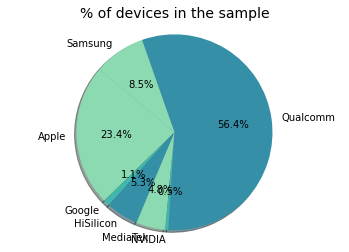

In [ ]:
## No of companies in the sample

labels = temp1.index
colors = sns.color_palette('mako_r')[0:3]

plt.pie(temp1.device, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('% of devices in the sample', size=14)

plt.axis('equal')

plt.show()


##### Company device performance level

In [32]:
cmpny = all_benchmark.groupby(['company']).mean(['cpuScore'])
cmpny

,cores,clock,cpuScore,gpuScore,npuScore
company,,,,,
Apple,5.340909,2507.522727,598.022727,1277.295455,1280.750000
Google,8.000000,1803.500000,315.500000,1371.000000,1662.000000
HiSilicon,8.000000,1849.200000,305.600000,820.800000,305.300000
MediaTek,8.000000,1955.555556,245.000000,716.444444,632.333333
NVIDIA,4.000000,2014.000000,154.000000,226.000000,108.000000
Qualcomm,7.905660,1790.537736,277.867925,886.226415,482.905660
Samsung,8.000000,1740.500000,159.437500,474.250000,178.250000


#### Companies with best benchmark Score

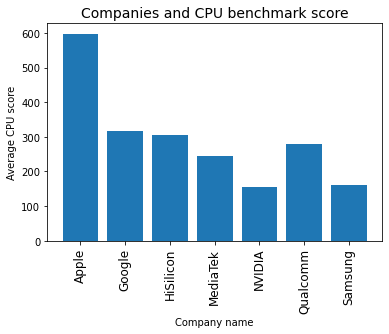

In [34]:
### Show companies with their respective CPU score

plt.bar(cmpny.index, cmpny.cpuScore)

plt.ylabel('Average CPU score')
plt.xlabel('Company name')
plt.xticks(rotation='vertical', size = 12)
plt.title('Companies and CPU benchmark score',  size=14)
plt.show()

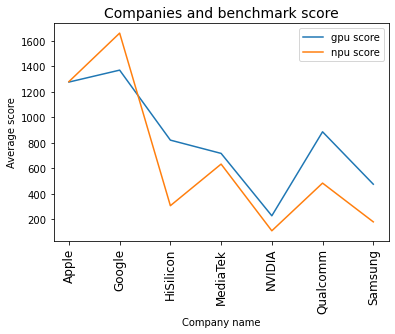

In [38]:
### Show companies with their respective GPU and NPU score

plt.plot(cmpny.index, cmpny.gpuScore)
plt.plot(cmpny.index, cmpny.npuScore)

plt.ylabel('Average score')
plt.xlabel('Company name')
plt.xticks(rotation='vertical', size = 12)
plt.title('Companies and benchmark score',  size=14)
plt.legend(['gpu score', 'npu score'])

plt.show()

In [ ]:
cmpny = all_benchmark.groupby(['company']).mean(['cpuScore'])
cmpny

,cores,clock,cpuScore,gpuScore,npuScore
company,,,,,
Apple,5.340909,2507.522727,598.022727,1277.295455,1280.750000
Google,8.000000,1803.500000,315.500000,1371.000000,1662.000000
HiSilicon,8.000000,1849.200000,305.600000,820.800000,305.300000
MediaTek,8.000000,1955.555556,245.000000,716.444444,632.333333
NVIDIA,4.000000,2014.000000,154.000000,226.000000,108.000000
Qualcomm,7.905660,1790.537736,277.867925,886.226415,482.905660
Samsung,8.000000,1740.500000,159.437500,474.250000,178.250000


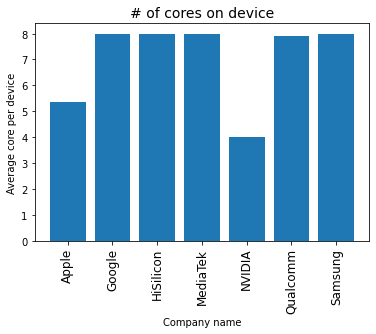

In [41]:
### Show companies with their respective GPU and NPU score

plt.bar(cmpny.index, cmpny.cores)


plt.ylabel('Average core per device')
plt.xlabel('Company name')
plt.xticks(rotation='vertical', size = 12)
plt.title('# of cores on device',  size=14)

plt.show()

#### CPUs and their respective performance

In [47]:
cpu = all_benchmark.groupby(['device_cpu']).mean(['cpuScore'])
cpu

,cores,clock,cpuScore,gpuScore,npuScore
device_cpu,,,,,
Apple A10 Fusion,4.0,2190.6,373.000000,665.800000,373.200000
Apple A10X Fusion,6.0,2340.0,607.500000,1053.500000,567.500000
Apple A11 Bionic,6.0,2390.0,407.333333,859.333333,430.333333
Apple A12 Bionic,6.0,2490.0,544.166667,1121.666667,1304.166667
Apple A12X Bionic,8.0,2490.0,686.000000,1890.500000,1383.500000
...,...,...,...,...,...
Samsung Exynos 9611,8.0,1742.0,122.750000,301.500000,102.750000
Samsung Exynos 980,8.0,1799.0,227.000000,639.000000,350.000000
Samsung Exynos 9810,8.0,1794.0,232.000000,679.000000,202.000000


##### Best performing chip set

In [55]:
### best performing cpu 

Top10 = cpu.nlargest(20, 'cpuScore')
Top10

,cores,clock,cpuScore,gpuScore,npuScore
device_cpu,,,,,
Apple M1,8.0,3190.0,1012.000000,2833.000000,2656.500000
Apple A15 Bionic,6.0,3168.0,921.000000,2062.400000,2625.600000
Apple A14 Bionic,6.0,2990.0,862.000000,1651.000000,2324.400000
Apple A13 Bionic,6.0,2660.0,687.250000,1365.250000,1636.500000
Apple A12X Bionic,8.0,2490.0,686.000000,1890.500000,1383.500000
Apple A12Z Bionic,8.0,2490.0,680.500000,1940.000000,1372.000000
Apple A10X Fusion,6.0,2340.0,607.500000,1053.500000,567.500000
Apple A12 Bionic,6.0,2490.0,544.166667,1121.666667,1304.166667
HiSilicon Kirin 9000,8.0,2045.0,441.000000,1290.000000,417.000000


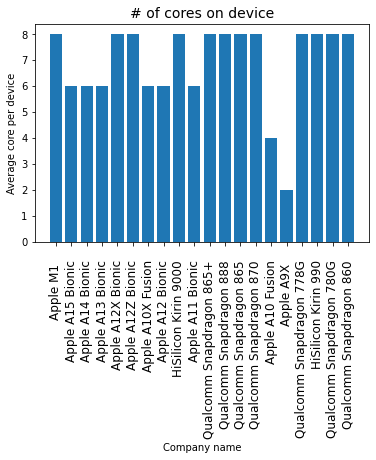

In [56]:
### Show cpu chip with the cores

plt.bar(Top10.index, Top10.cores)


plt.ylabel('Average core per device')
plt.xlabel('Company name')
plt.xticks(rotation='vertical', size = 12)
plt.title('# of cores on device',  size=14)

plt.show()

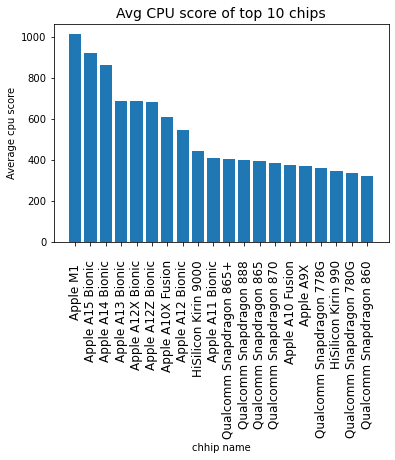

In [57]:
### Show cpu chip with the best cpu score

plt.bar(Top10.index, Top10.cpuScore)


plt.ylabel('Average cpu score')
plt.xlabel('chhip name')
plt.xticks(rotation='vertical', size = 12)
plt.title('Avg CPU score of top 10 chips',  size=14)

plt.show()

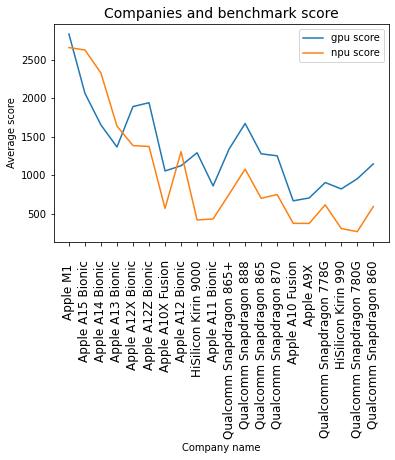

In [58]:
### Show cpu with their respective GPU and NPU score

plt.plot(Top10.index, Top10.gpuScore)
plt.plot(Top10.index, Top10.npuScore)

plt.ylabel('Average score')
plt.xlabel('Company name')
plt.xticks(rotation='vertical', size = 12)
plt.title('Companies and benchmark score',  size=14)
plt.legend(['gpu score', 'npu score'])

plt.show()

##### Lowest performing Chip sets

In [59]:
### Lowest performing cpu 

bottom10 = cpu.nsmallest(20, 'cpuScore')
bottom10

,cores,clock,cpuScore,gpuScore,npuScore
device_cpu,,,,,
Qualcomm Snapdragon 808,6.0,1440.0,78.00,75.000000,68.000000
Qualcomm Snapdragon 810,8.0,1555.0,85.00,111.000000,71.000000
Samsung Exynos 7884,8.0,1352.0,89.00,210.000000,74.000000
Samsung Exynos 850,8.0,2002.0,96.00,177.000000,56.000000
Samsung Exynos 9610,8.0,1742.0,122.00,293.000000,85.000000
Samsung Exynos 9611,8.0,1742.0,122.75,301.500000,102.750000
HiSilicon Kirin 710,8.0,1709.0,127.00,269.000000,107.000000
Qualcomm Snapdragon 660,8.0,1843.0,128.00,277.000000,101.000000
Samsung Exynos 8890,8.0,1300.0,133.00,400.000000,71.000000


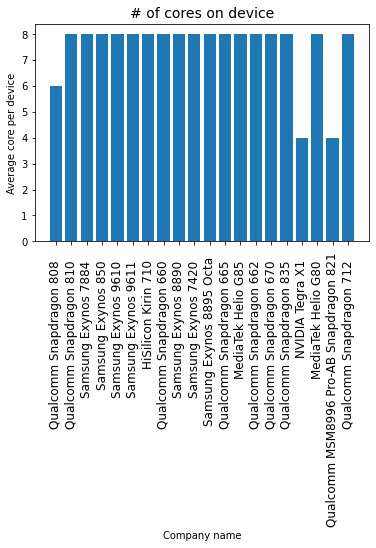

In [64]:
### Show cpu chip with the cores

plt.bar(bottom10.index, bottom10.cores)

plt.ylabel('Average core per device')
plt.xlabel('Company name')
plt.xticks(rotation='vertical', size = 12)
plt.title('# of cores on device',  size=14)

plt.show()

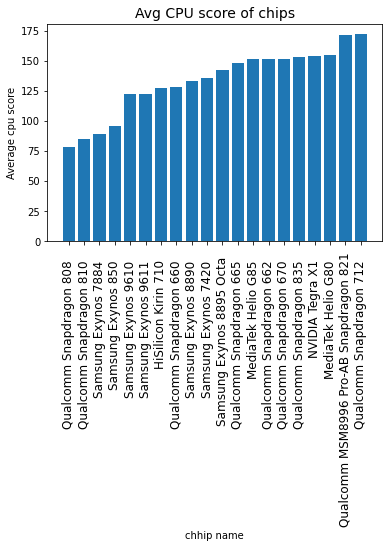

In [66]:
### Show cpu chip with the  cpu score

plt.bar(bottom10.index, bottom10.cpuScore)


plt.ylabel('Average cpu score')
plt.xlabel('chhip name')
plt.xticks(rotation='vertical', size = 12)
plt.title('Avg CPU score of chips',  size=14)

plt.show()

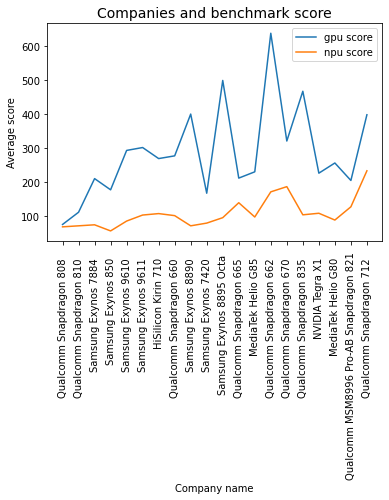

In [68]:
### Show cpu with their respective GPU and NPU score

plt.plot(bottom10.index, bottom10.gpuScore)
plt.plot(bottom10.index, bottom10.npuScore)

plt.ylabel('Average score')
plt.xlabel('Company name')
plt.xticks(rotation='vertical', size = 10)
plt.title('Companies and benchmark score',  size=14)
plt.legend(['gpu score', 'npu score'])

plt.show()

#### Devices and their respective performance

In [80]:
device = all_benchmark.groupby(['device']).mean()
device

,cores,clock,cpuScore,gpuScore,npuScore
device,,,,,
ASUS ROG Phone 3,8.0,1804.0,422.0,1417.0,876.0
Asus ROG Phone 5,8.0,1804.0,447.0,1810.0,856.0
Asus Zenfone 7,8.0,1804.0,434.0,1365.0,773.0
Asus Zenfone 8,8.0,1804.0,413.0,1638.0,635.0
Essential PH-1,8.0,1900.0,154.0,353.0,125.0
...,...,...,...,...,...
iPhone X,6.0,2390.0,403.0,864.0,433.0
iPhone XR,6.0,2490.0,520.0,1097.0,1304.0
iPhone XS,6.0,2490.0,546.0,1110.0,1300.0


##### Best performing devices and their respective cores

In [ ]:
top_device_cpu = device.nlargest(20, 'cpuScore')
top_device_gpu = device.nlargest(20, 'gpuScore')
top_device_npu = device.nlargest(20, 'npuScore')
top_device_cpu.astype(int)
top_device_gpu.astype(int)

C:\Users\sadeo\AppData\Local\Temp/ipykernel_12764/2670479393.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10)
C:\Users\sadeo\AppData\Local\Temp/ipykernel_12764/2670479393.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


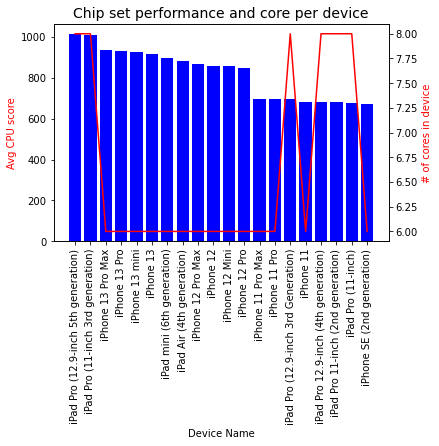

In [97]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

keys = top_device_cpu.index

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, top_device_cpu.cpuScore, color='b')
ax2.plot(keys, top_device_cpu.cores, color='red')

ax1.set_xlabel('Device Name')
ax1.set_ylabel('Avg CPU score', color='red')
ax2.set_ylabel('# of cores in device', color='red')
ax1.set_xticklabels(keys, rotation='vertical', size=10)
ax1.set_title('Chip set performance and core per device', size=14)

fig.show()


C:\Users\sadeo\AppData\Local\Temp/ipykernel_12764/59805645.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10)
C:\Users\sadeo\AppData\Local\Temp/ipykernel_12764/59805645.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


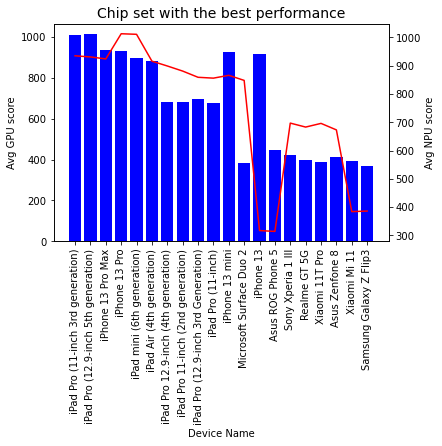

In [108]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

keys = top_device_gpu.index

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, top_device_gpu.cpuScore, color='b')
ax2.plot(keys, top_device_npu.cpuScore, color='red')

ax1.set_xlabel('Device Name')
ax1.set_ylabel('Avg GPU score', color='black')
ax2.set_ylabel('Avg NPU score', color='black')
ax1.set_xticklabels(keys, rotation='vertical', size=10)
ax1.set_title('Chip set with the best performance', size=14)

fig.show()


##### Poorest performing devices and their respective cores

In [ ]:
bottom_device_cpu = device.nsmallest(20, 'cpuScore')
bottom_device_gpu = device.nsmallest(20, 'gpuScore')
bottom_device_npu = device.nsmallest(20, 'npuScore')
bottom_device_cpu.astype(int)
bottom_device_gpu.astype(int)
bottom_device_npu.astype(int)

C:\Users\sadeo\AppData\Local\Temp/ipykernel_12764/2239370192.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10)
C:\Users\sadeo\AppData\Local\Temp/ipykernel_12764/2239370192.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


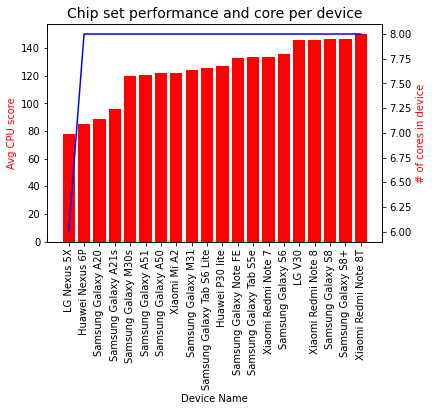

In [100]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

keys = bottom_device_cpu.index

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, bottom_device_cpu.cpuScore, color='red')
ax2.plot(keys, bottom_device_cpu.cores, color='b')

ax1.set_xlabel('Device Name')
ax1.set_ylabel('Avg CPU score', color='red')
ax2.set_ylabel('# of cores in device', color='red')
ax1.set_xticklabels(keys, rotation='vertical', size=10)
ax1.set_title('Chip set performance and core per device', size=14)

fig.show()


C:\Users\sadeo\AppData\Local\Temp/ipykernel_12764/349462694.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10)
C:\Users\sadeo\AppData\Local\Temp/ipykernel_12764/349462694.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


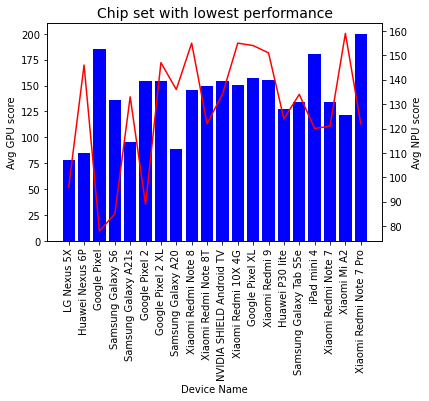

In [107]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

keys = bottom_device_gpu.index

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, bottom_device_gpu.cpuScore, color='b')
ax2.plot(keys, bottom_device_npu.cpuScore, color='red')

ax1.set_xlabel('Device Name')
ax1.set_ylabel('Avg GPU score', color='black')
ax2.set_ylabel('Avg NPU score', color='black')
ax1.set_xticklabels(keys, rotation='vertical', size=10)
ax1.set_title('Chip set with lowest performance', size=14)

fig.show()

#### The Fastest chip set 

In [112]:
speed = all_benchmark.groupby(['device_cpu']).mean(['clock'])
speed.head()

,cores,clock,cpuScore,gpuScore,npuScore
device_cpu,,,,,
Apple A10 Fusion,4.0,2190.6,373.000000,665.800000,373.200000
Apple A10X Fusion,6.0,2340.0,607.500000,1053.500000,567.500000
Apple A11 Bionic,6.0,2390.0,407.333333,859.333333,430.333333
Apple A12 Bionic,6.0,2490.0,544.166667,1121.666667,1304.166667
Apple A12X Bionic,8.0,2490.0,686.000000,1890.500000,1383.500000


In [127]:
fastest_device = speed.nlargest(20, 'clock')
fastest_device.head()

,cores,clock,cpuScore,gpuScore,npuScore
device_cpu,,,,,
Apple M1,8.0,3190.0,1012.000000,2833.000000,2656.500000
Apple A15 Bionic,6.0,3168.0,921.000000,2062.400000,2625.600000
Apple A14 Bionic,6.0,2990.0,862.000000,1651.000000,2324.400000
Apple A13 Bionic,6.0,2660.0,687.250000,1365.250000,1636.500000
Apple A12 Bionic,6.0,2490.0,544.166667,1121.666667,1304.166667


C:\Users\sadeo\AppData\Local\Temp/ipykernel_12764/3120188374.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10)
C:\Users\sadeo\AppData\Local\Temp/ipykernel_12764/3120188374.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


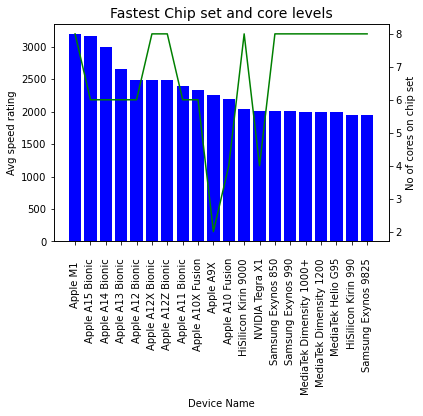

In [117]:
keys = fastest_device.index

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, fastest_device.clock , color='b')
ax2.plot(keys, fastest_device.cores, color='g')

ax1.set_xlabel('Device Name')
ax1.set_ylabel('Avg speed rating', color='black')
ax2.set_ylabel('No of cores on chip set', color='black')
ax1.set_xticklabels(keys, rotation='vertical', size=10)
ax1.set_title('Fastest Chip set and core levels', size=14)

fig.show()

#### The fastest smartphone on the market currently

In [118]:
all_benchmark.head()

,device,company,cpuName,cores,clock,cpuScore,gpuScore,npuScore,device_cpu
0,iPhone 13 Pro Max,Apple,A15 Bionic,6,3230,935,2273,2676,Apple A15 Bionic
1,iPhone 13 Pro,Apple,A15 Bionic,6,3230,931,2261,2665,Apple A15 Bionic
2,iPhone 13 mini,Apple,A15 Bionic,6,3230,924,1852,2660,Apple A15 Bionic
3,iPad Pro (12.9-inch 5th generation),Apple,M1,8,3190,1013,2824,2657,Apple M1
4,iPad Pro (11-inch 3rd generation),Apple,M1,8,3190,1011,2842,2656,Apple M1


In [120]:
phone_spd = all_benchmark.groupby(['device']).mean(['clock'])
phone_spd

,cores,clock,cpuScore,gpuScore,npuScore
device,,,,,
ASUS ROG Phone 3,8.0,1804.0,422.0,1417.0,876.0
Asus ROG Phone 5,8.0,1804.0,447.0,1810.0,856.0
Asus Zenfone 7,8.0,1804.0,434.0,1365.0,773.0
Asus Zenfone 8,8.0,1804.0,413.0,1638.0,635.0
Essential PH-1,8.0,1900.0,154.0,353.0,125.0
...,...,...,...,...,...
iPhone X,6.0,2390.0,403.0,864.0,433.0
iPhone XR,6.0,2490.0,520.0,1097.0,1304.0
iPhone XS,6.0,2490.0,546.0,1110.0,1300.0


In [126]:
fastest_phone = phone_spd.nlargest(30, 'clock')
fastest_phone.head()

,cores,clock,cpuScore,gpuScore,npuScore
device,,,,,
iPhone 13,6.0,3230.0,916.0,1831.0,2605.0
iPhone 13 Pro,6.0,3230.0,931.0,2261.0,2665.0
iPhone 13 Pro Max,6.0,3230.0,935.0,2273.0,2676.0
iPhone 13 mini,6.0,3230.0,924.0,1852.0,2660.0
iPad Pro (11-inch 3rd generation),8.0,3190.0,1011.0,2842.0,2656.0


C:\Users\sadeo\AppData\Local\Temp/ipykernel_12764/1026147170.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10)
C:\Users\sadeo\AppData\Local\Temp/ipykernel_12764/1026147170.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


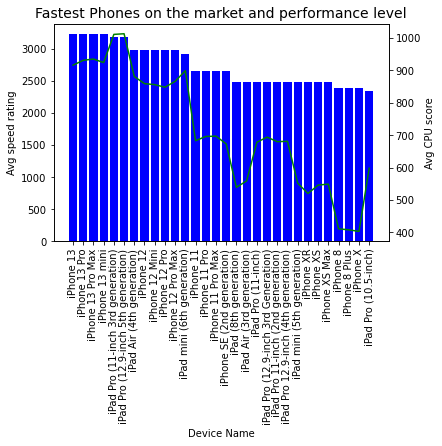

In [125]:
keys = fastest_phone.index

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, fastest_phone.clock , color='b')
ax2.plot(keys, fastest_phone.cpuScore, color='g')

ax1.set_xlabel('Device Name')
ax1.set_ylabel('Avg speed rating', color='black')
ax2.set_ylabel('Avg CPU score', color='black')
ax1.set_xticklabels(keys, rotation='vertical', size=10)
ax1.set_title('Fastest Phones on the market and performance level', size=14)

fig.show()